In [2]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from mebocost import mebocost

Warning (xlmhg): Failed to import "mhg_cython" C extension.
Warning (xlmhg): Failed to import the "mhg_cython" C extension.Falling back to the pure Python implementation, which is very slow.


In [3]:
os.chdir('/Users/elias/MEBOCOST')
os.getcwd()

'C:\\Users\\elias\\MEBOCOST'

In [4]:
adata = sc.read_h5ad('/Users/elias/MEBOCOST/data/demo/raw_scRNA/demo_HNSC_200cell.h5ad')
## check adata (cells, genes)
print(adata.shape)


(200, 18241)


In [14]:
adata.var_names

Index(['C9orf152', 'RPS11', 'ELMO2', 'CREB3L1', 'PNMA1', 'MMP2', 'TMEM216',
       'TRAF3IP2-AS1', 'C10orf90', 'ZHX3',
       ...
       'GRIP2', 'GOLGA8B', 'GPLD1', 'RAB8A', 'PCIF1', 'PIK3IP1', 'SNRPD2',
       'SLC39A6', 'CTSC', 'AQP7'],
      dtype='object', length=18241)

In [15]:
mebo_obj = mebocost.create_obj(
                        adata = adata[1:10,1:10],
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = '/Users/elias/MEBOCOST/src/mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        gene_network=None,
                        gmt_path=None,
                        cutoff_exp='auto', ## automated cutoff to exclude lowly ranked 25% sensors across all cells
                        cutoff_met='auto', ## automated cutoff to exclude lowly ranked 25% metabolites across all cells
                        cutoff_prop=0.25, ## at lease 25% of cells should be expressed the sensor or present the metabolite in the cell group (specified by group_col)
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )

[November 30, 2022 18:51:53]: We get expression data with 9 genes and 9 cells.
[November 30, 2022 18:51:53]: scanpy object contains less than 5000 genes, please make sure you are using raw.to_adata()
[November 30, 2022 18:51:53]: Data Preparation Done in 0.0060 seconds


In [42]:
## 【optional】only estimate metabolite abundance for cells using expression data
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
mebo_obj._load_config_()
mebo_obj.estimator()

[November 30, 2022 13:23:00]: Load config and read data based on given species [human].
[November 30, 2022 13:23:07]: Estimtate metabolite level using mebocost


In [43]:
## check the metabolite estimation result
met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      index = mebo_obj.met_mat_indexer,
                      columns = mebo_obj.met_mat_columns)
## print head
met_mat.head()

HNSCC5_p14_HNSCC5_P14_LN_H02  HNSCC_17_P10_C11_S227_comb  \
HMDB0003450                      0.000000                    0.000000   
HMDB0003948                      0.255695                    0.303540   
HMDB0003712                      0.204556                    0.242832   
HMDB0003945                      0.227284                    0.366798   
HMDB0003949                      0.255695                    0.303540   

             HNSCC6_p15_HNSCC6_P15_LN_D05  HNSCC25_P2_A10_S10_comb  \
HMDB0003450                      0.000000                 0.000000   
HMDB0003948                      0.267465                 0.000000   
HMDB0003712                      0.302952                 0.000000   
HMDB0003945                      0.383685                 0.222933   
HMDB0003949                      0.267465                 0.000000   

             HNSCC16_P4_HNSCC16_P4_B11  HNSCC18_P7_F06_S162_comb  \
HMDB0003450                   0.000000                  0.000000   
HMDB0003948                   0.413994                  0.146958   
HMDB0003712                   0.331195                  0.117567   
HMDB0003945                   0.447552                  0.441383   
HMDB0003949                   0.413994                  0.146958   

             HNSCC25_P4_E04_S244_comb  HNSCC20_P5_pri_A01_S1_comb  \
HMDB0003450                       0.0                    0.000000   
HMDB0003948                       0.0                    0.327930   
HMDB0003712                       0.0                    0.342155   
HMDB0003945                       0.0                    0.480210   
HMDB0003949                       0.0                    0.327930   

             HN28_P5_F10_S262_comb  HNSCC17_P13_E12_S348_comb  ...  \
HMDB0003450               0.000000                   0.000000  ...   
HMDB0003948               0.210271                   0.000835  ...   
HMDB0003712               0.235718                   0.297141  ...   
HMDB0003945               0.296026                   0.000742  ...   
HMDB0003949               0.210271                   0.000835  ...   

             HNSCC6_p16_HNSCC6_P16_B03  HNSCC8_1ant_HNSCC8_1ant_A06  \
HMDB0003450                   0.000000                     0.000000   
HMDB0003948                   0.225085                     0.183810   
HMDB0003712                   0.180068                     0.147048   
HMDB0003945                   0.200076                     0.163386   
HMDB0003949                   0.225085                     0.183810   

             HNSCC26_P24_H06_S378_comb  HNSCC16_P2_F09_S69_comb  \
HMDB0003450                   0.000000                 0.000000   
HMDB0003948                   0.359314                 0.002629   
HMDB0003712                   0.473624                 0.226876   
HMDB0003945                   0.319390                 0.249946   
HMDB0003949                   0.359314                 0.002629   

             HNSCC6_p14_hnscc6_p14_D12  HNSCC18_P2_F02_S158_comb  \
HMDB0003450                   0.000000                  0.000000   
HMDB0003948                   0.433498                  0.413497   
HMDB0003712                   0.421987                  0.330798   
HMDB0003945                   0.539379                  0.367553   
HMDB0003949                   0.433498                  0.413497   

             HNSCC16_P12_HNSCC16_P12_G10  HNSCC16_P14_HNSCC16_P14_H10  \
HMDB0003450                     0.000000                     0.000000   
HMDB0003948                     0.001104                     0.004354   
HMDB0003712                     0.000883                     0.003483   
HMDB0003945                     0.328898                     0.003870   
HMDB0003949                     0.001104                     0.004354   

             HNSCC6_p16_HNSCC6_P16_E07  HNSCC28_P13_A12_S204_comb  
HMDB0003450                   0.000000                   0.000000  
HMDB0003948                   0.202068                   0.313849  
HMDB0003712               

In [44]:
## metabolic communication inference
## Note: by default, this function include estimator for metabolite abundance
commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 1
                            )

[November 30, 2022 13:27:55]: Load config and read data based on given species [human].
[November 30, 2022 13:28:04]: Estimtate metabolite level using mebocost
[November 30, 2022 13:28:55]: Infer communications
[November 30, 2022 13:28:55]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[November 30, 2022 13:28:55]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[November 30, 2022 13:28:55]: met_sensor: (317, 8)
[November 30, 2022 13:28:55]: avg_exp: (2100, 11) for (gene, cell) of needed
[November 30, 2022 13:28:55]: avg_met: (587, 11) for (metabolite, cell) of needed
[November 30, 2022 13:28:55]: shuffling 1000 times for generating backgroud
[November 30, 2022 13:28:55]: take exp and met avg for shuffling
[November 30, 2022 13:29:18]: thread: 8
[November 30, 2022 13:44:15]: Calculating aboundance of metabolite and sensor expression in cell groups
[November 30, 2022 13:44:16]: automated cutoff for sensor expression, cutoff=0.013208496384322643
[Nov

In [46]:
# ### save 
mebocost.save_obj(obj = mebo_obj, path = '/Users/elias/Documents/Praktika/Julio_Saez-Rodriguez/Python/demo_HNSC_200cell_commu.pk')

In [47]:


## re-load the previous object if needed
mebo_obj = mebocost.load_obj('/Users/elias/Documents/Praktika/Julio_Saez-Rodriguez/Python/demo_HNSC_200cell_commu.pk')



[November 30, 2022 13:52:48]: Data Preparation Done in 0.0100 seconds


In [48]:
## check cutoff
print('sensor_exp cutoff: %s'%mebo_obj.cutoff_exp)
print('metabolite_presence cutoff: %s'%mebo_obj.cutoff_met)

sensor_exp cutoff: 0.013208496384322643
metabolite_presence cutoff: 0.03198429848998785


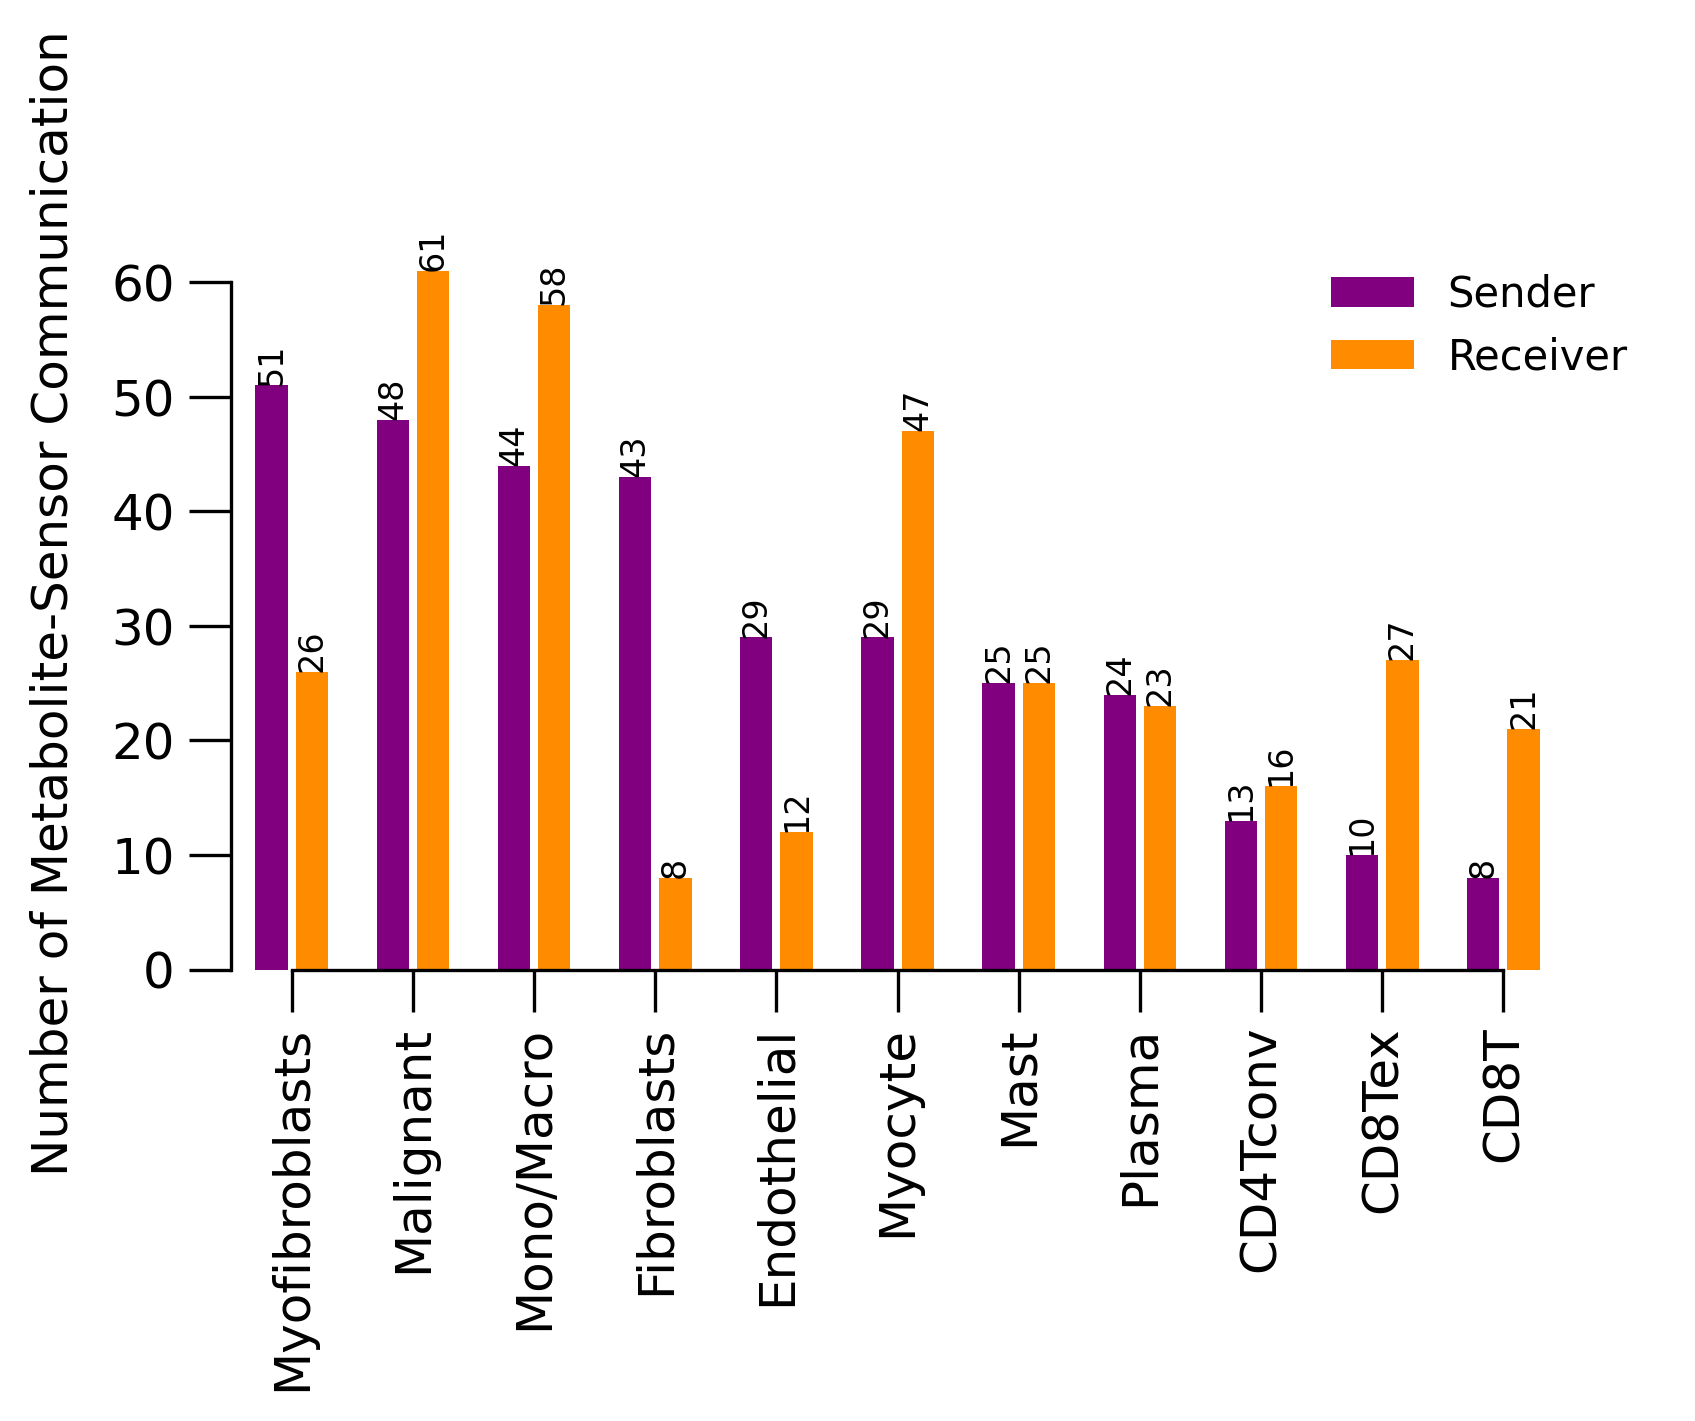

In [49]:
## sender and receiver event number
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )

[November 30, 2022 13:53:30]: show communication in cells by network plot


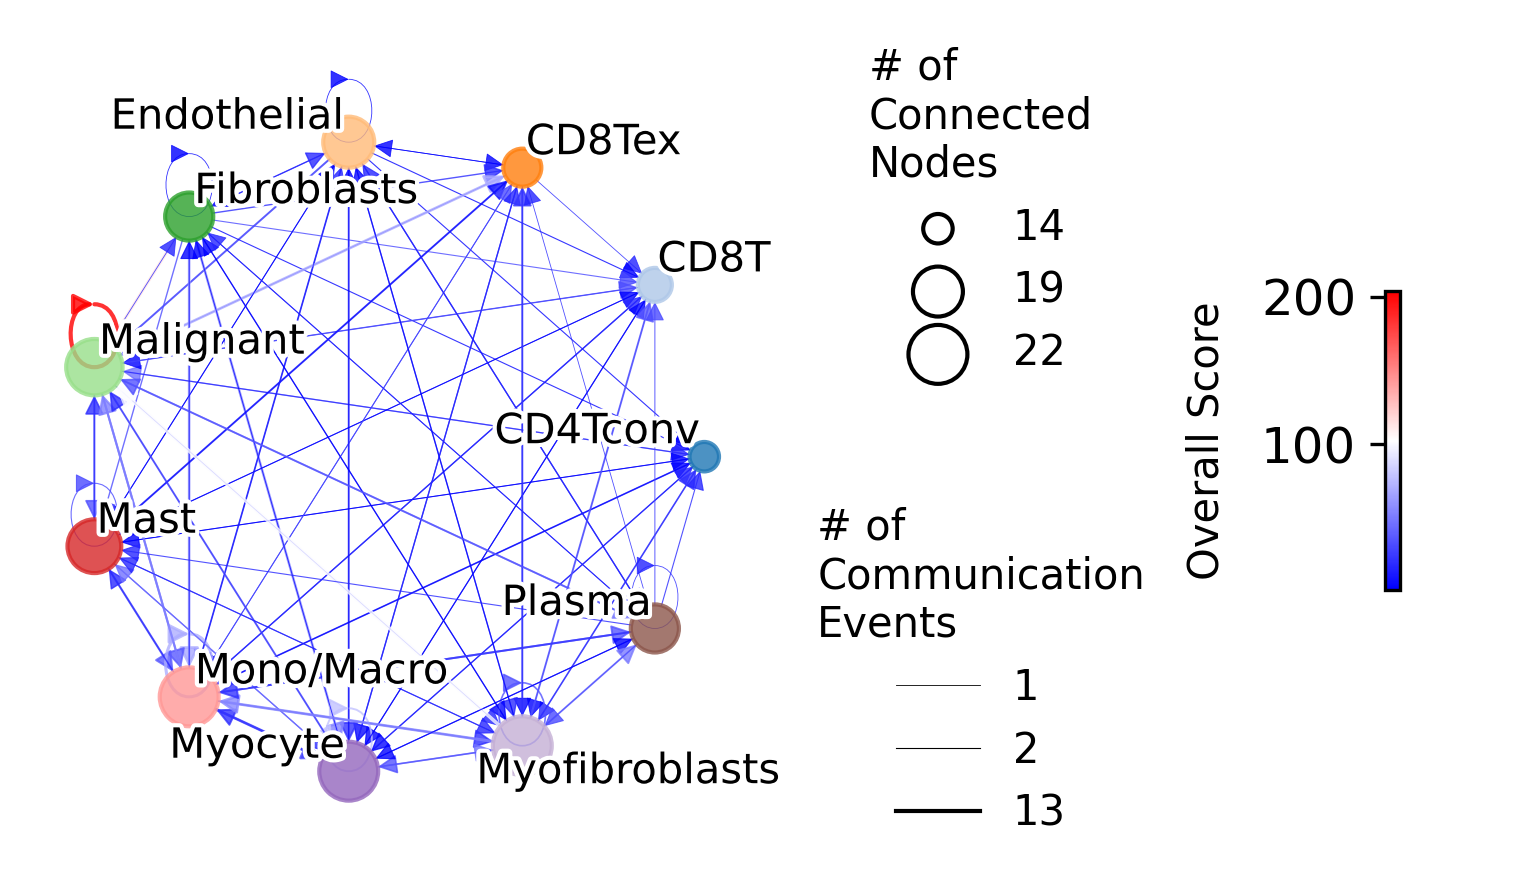

In [50]:
## circle plot to show communications between cell groups
mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize='auto',
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    node_size_norm=(50, 200),
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save=None,
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0,
                    text_outline=True,
                    return_fig=False
                )

### the "overall score" represent the sum of -log10(FDR) of detected metabolite-sensor communications between a pair of cell types

[November 30, 2022 13:53:52]: plot dot plot to show communication in cell type level


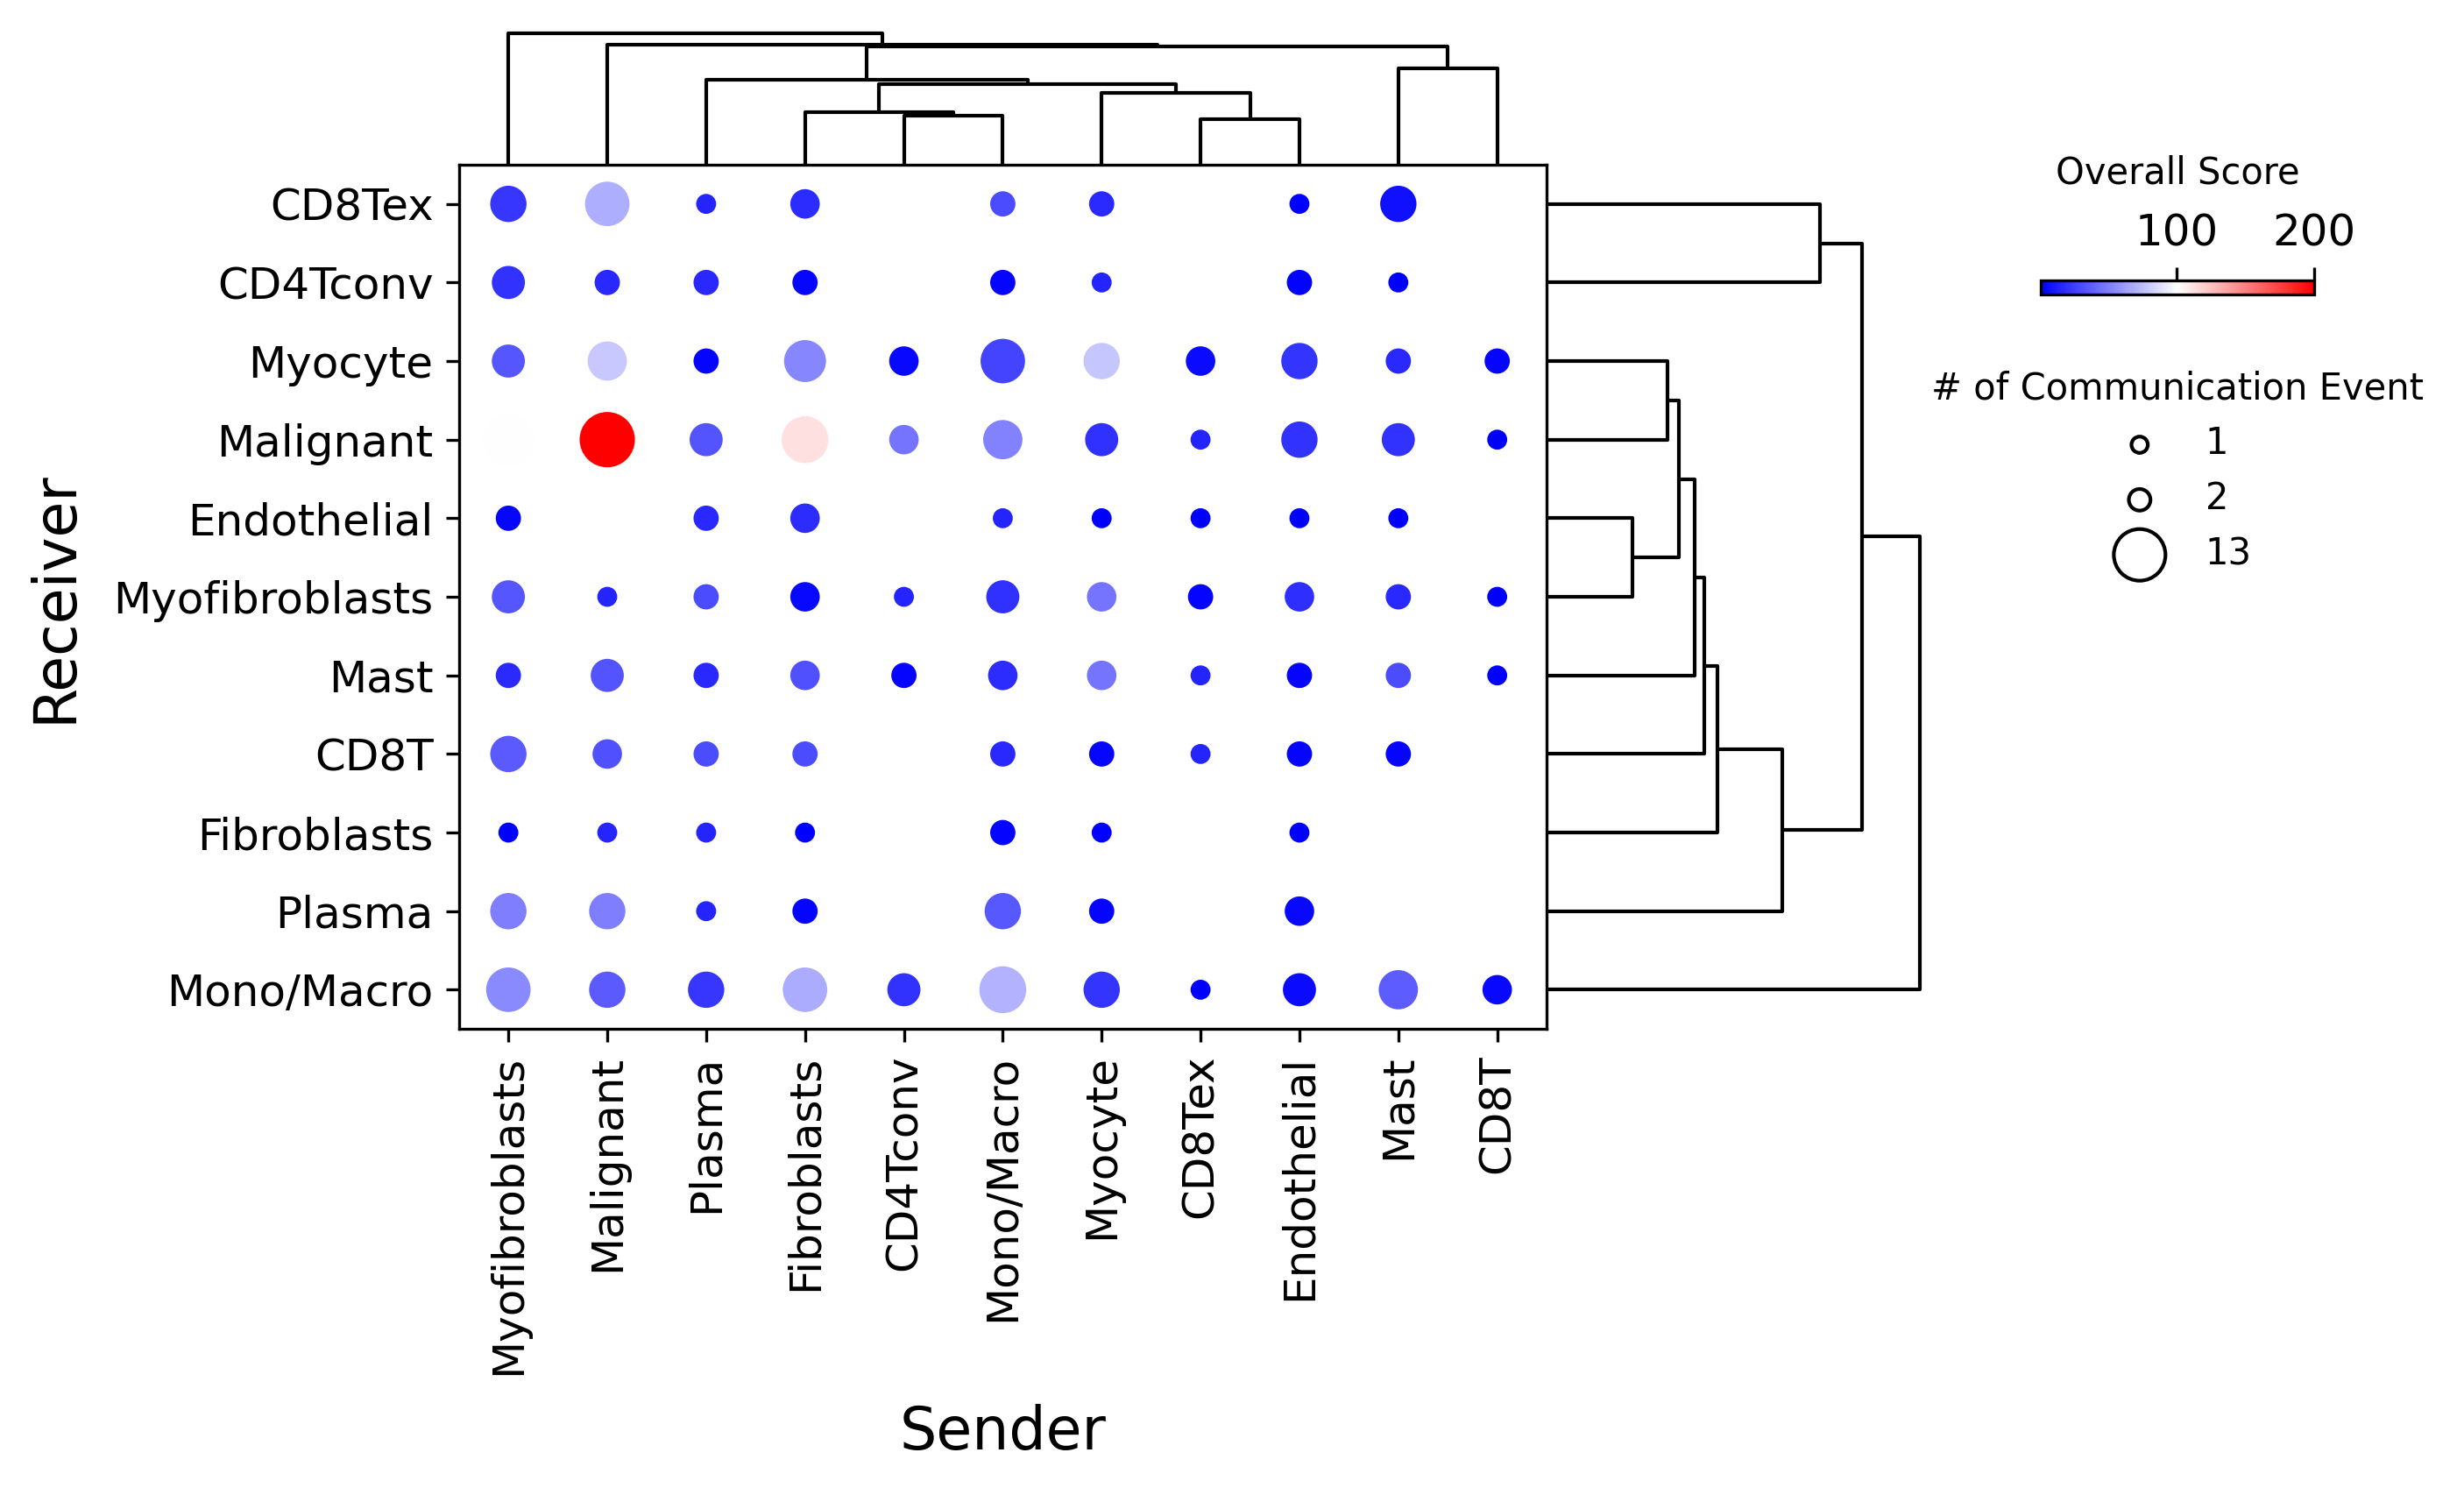

In [51]:
### dot plot to show the number of communications between cells

mebo_obj.count_dot_plot(
                        pval_method='permutation_test_fdr',
                        pval_cutoff=0.05,
                        cmap='bwr',
                        figsize='auto',
                        save=None,
                        dot_size_norm=(20, 200),
                        dot_color_vmin=None,
                        dot_color_vmax=200,
                        show_plot=True,
                        comm_score_col='Commu_Score',
                        comm_score_cutoff=0,
                        return_fig = False
                    )

[November 30, 2022 13:54:13]: plot heatmap for significant result


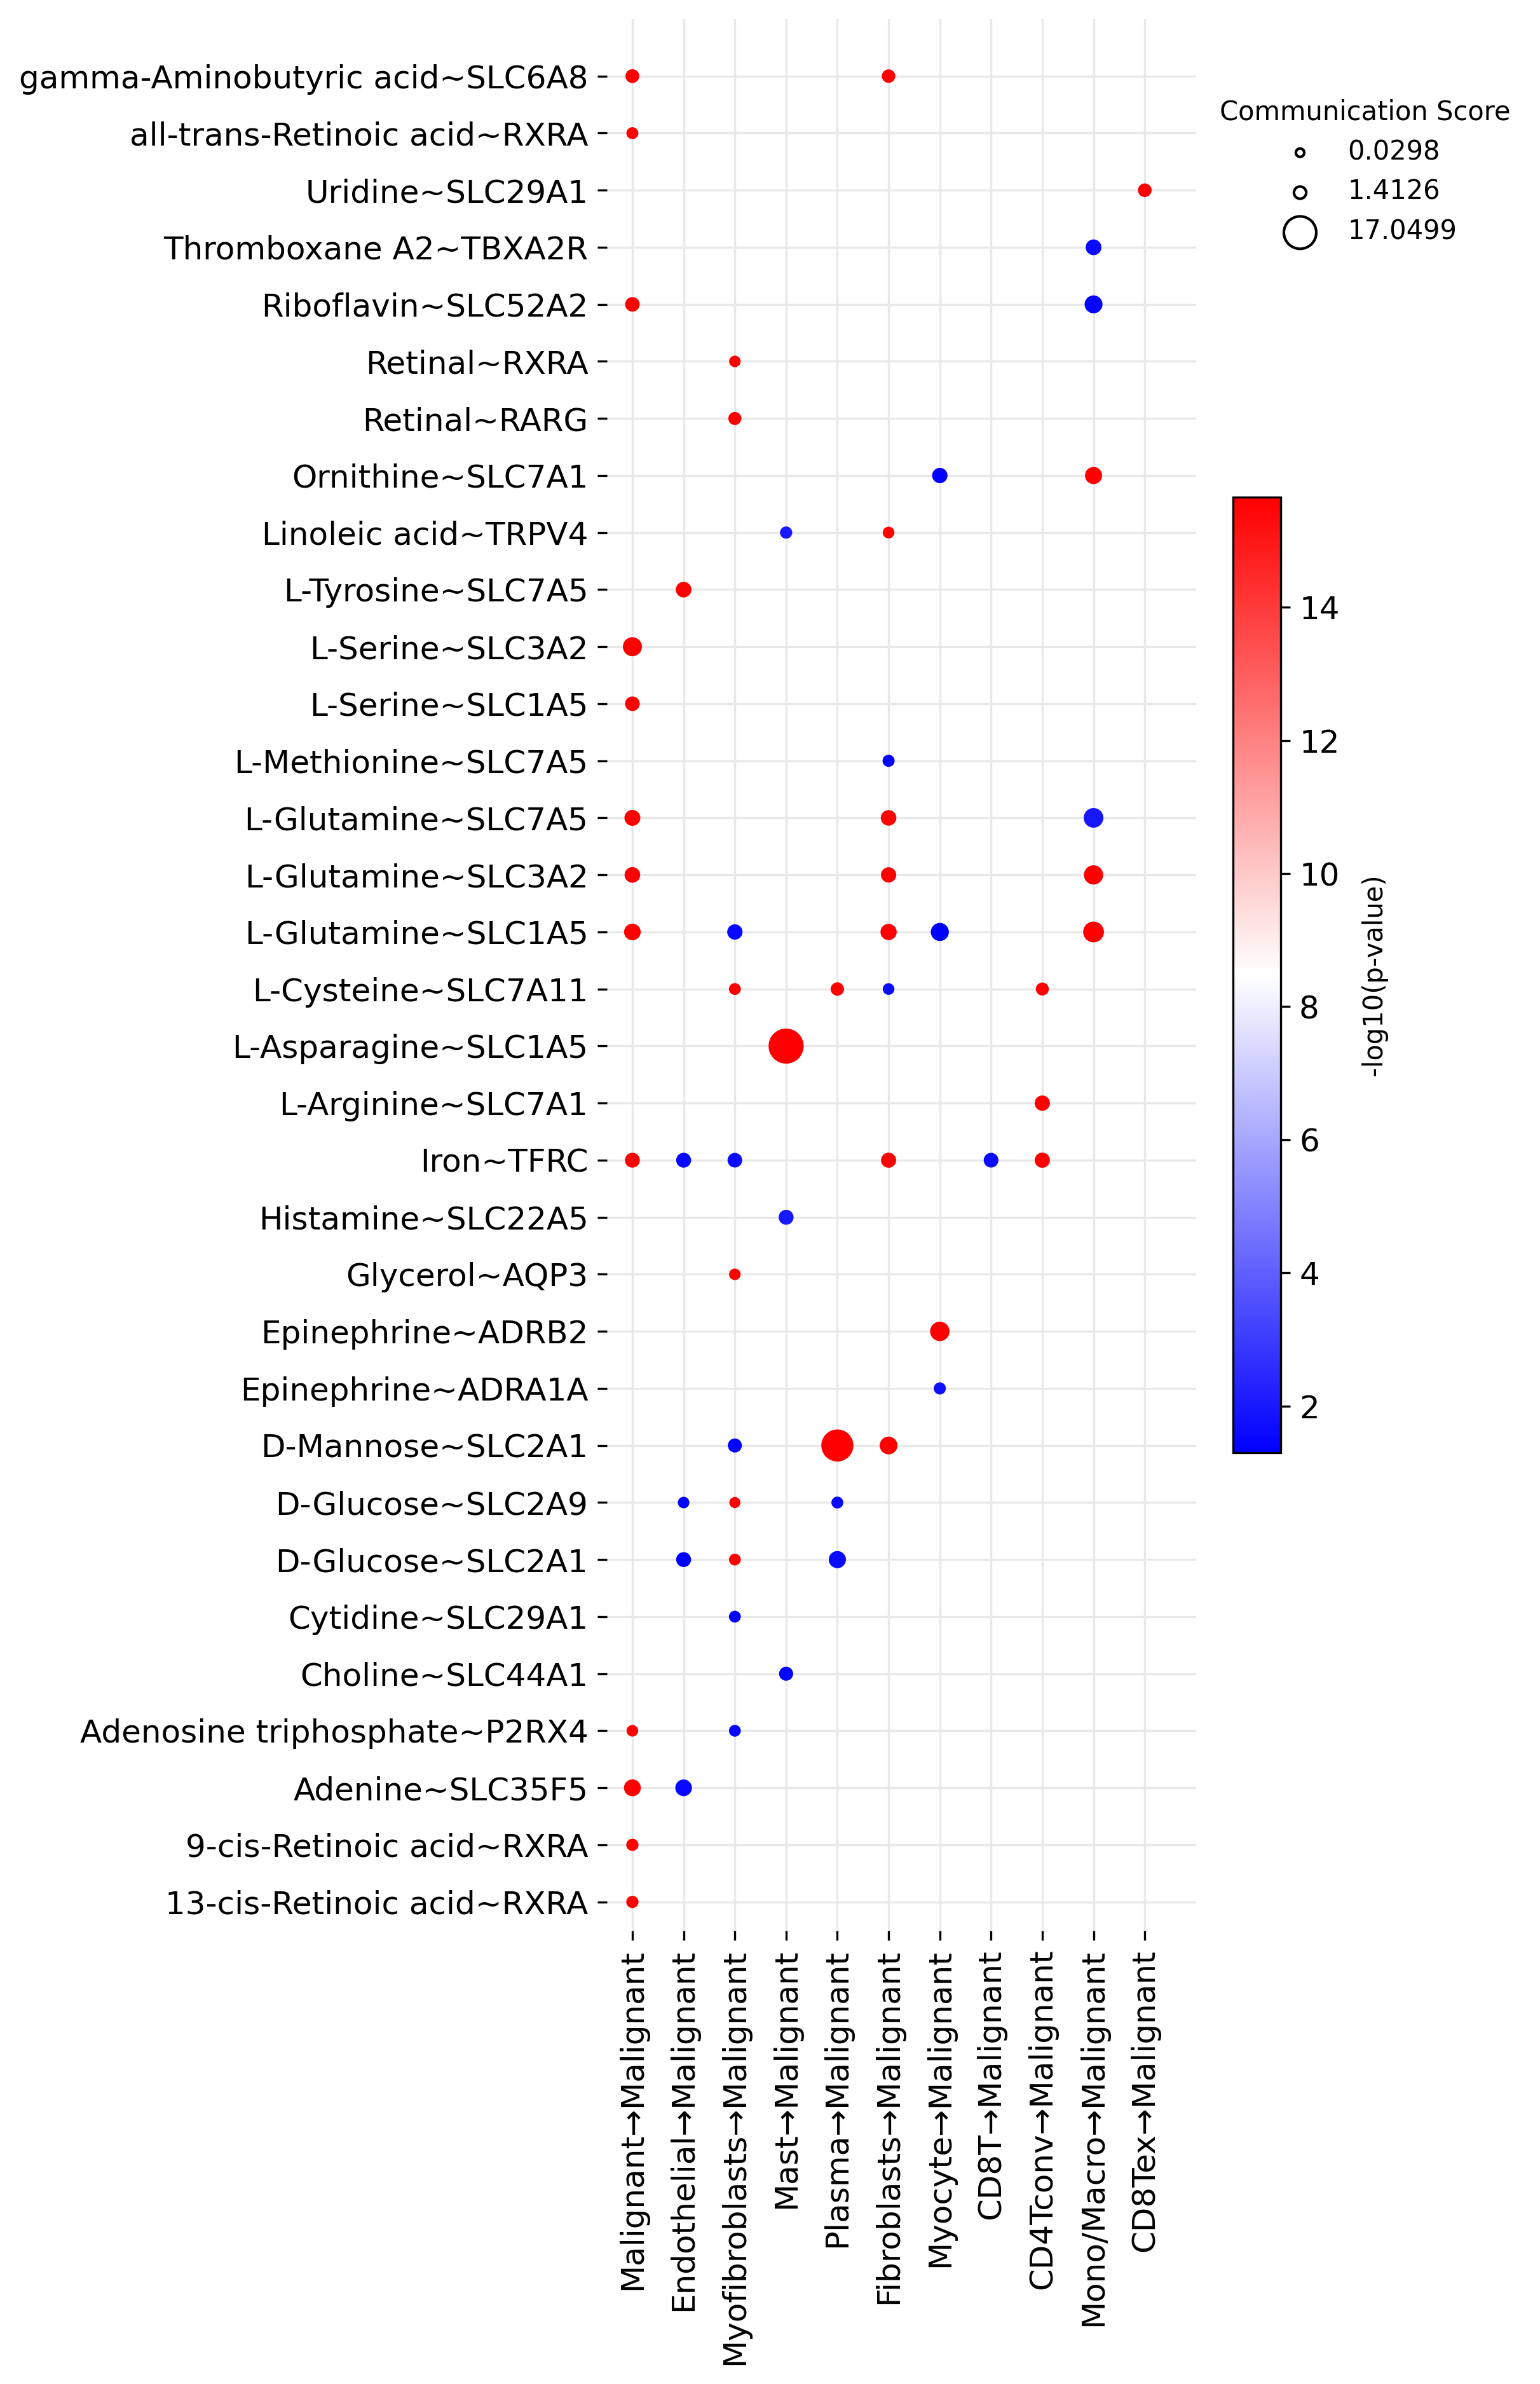

In [52]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.commu_dotmap(
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=['Malignant'],
                and_or='and',
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                figsize='auto',
                cmap='bwr',
                node_size_norm=(10, 150),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                swap_axis = False,
                return_fig = False
                )

[November 30, 2022 13:54:32]: plot flow plot to show the communications from Sender -> Metabolite -> Sensor -> Receiver


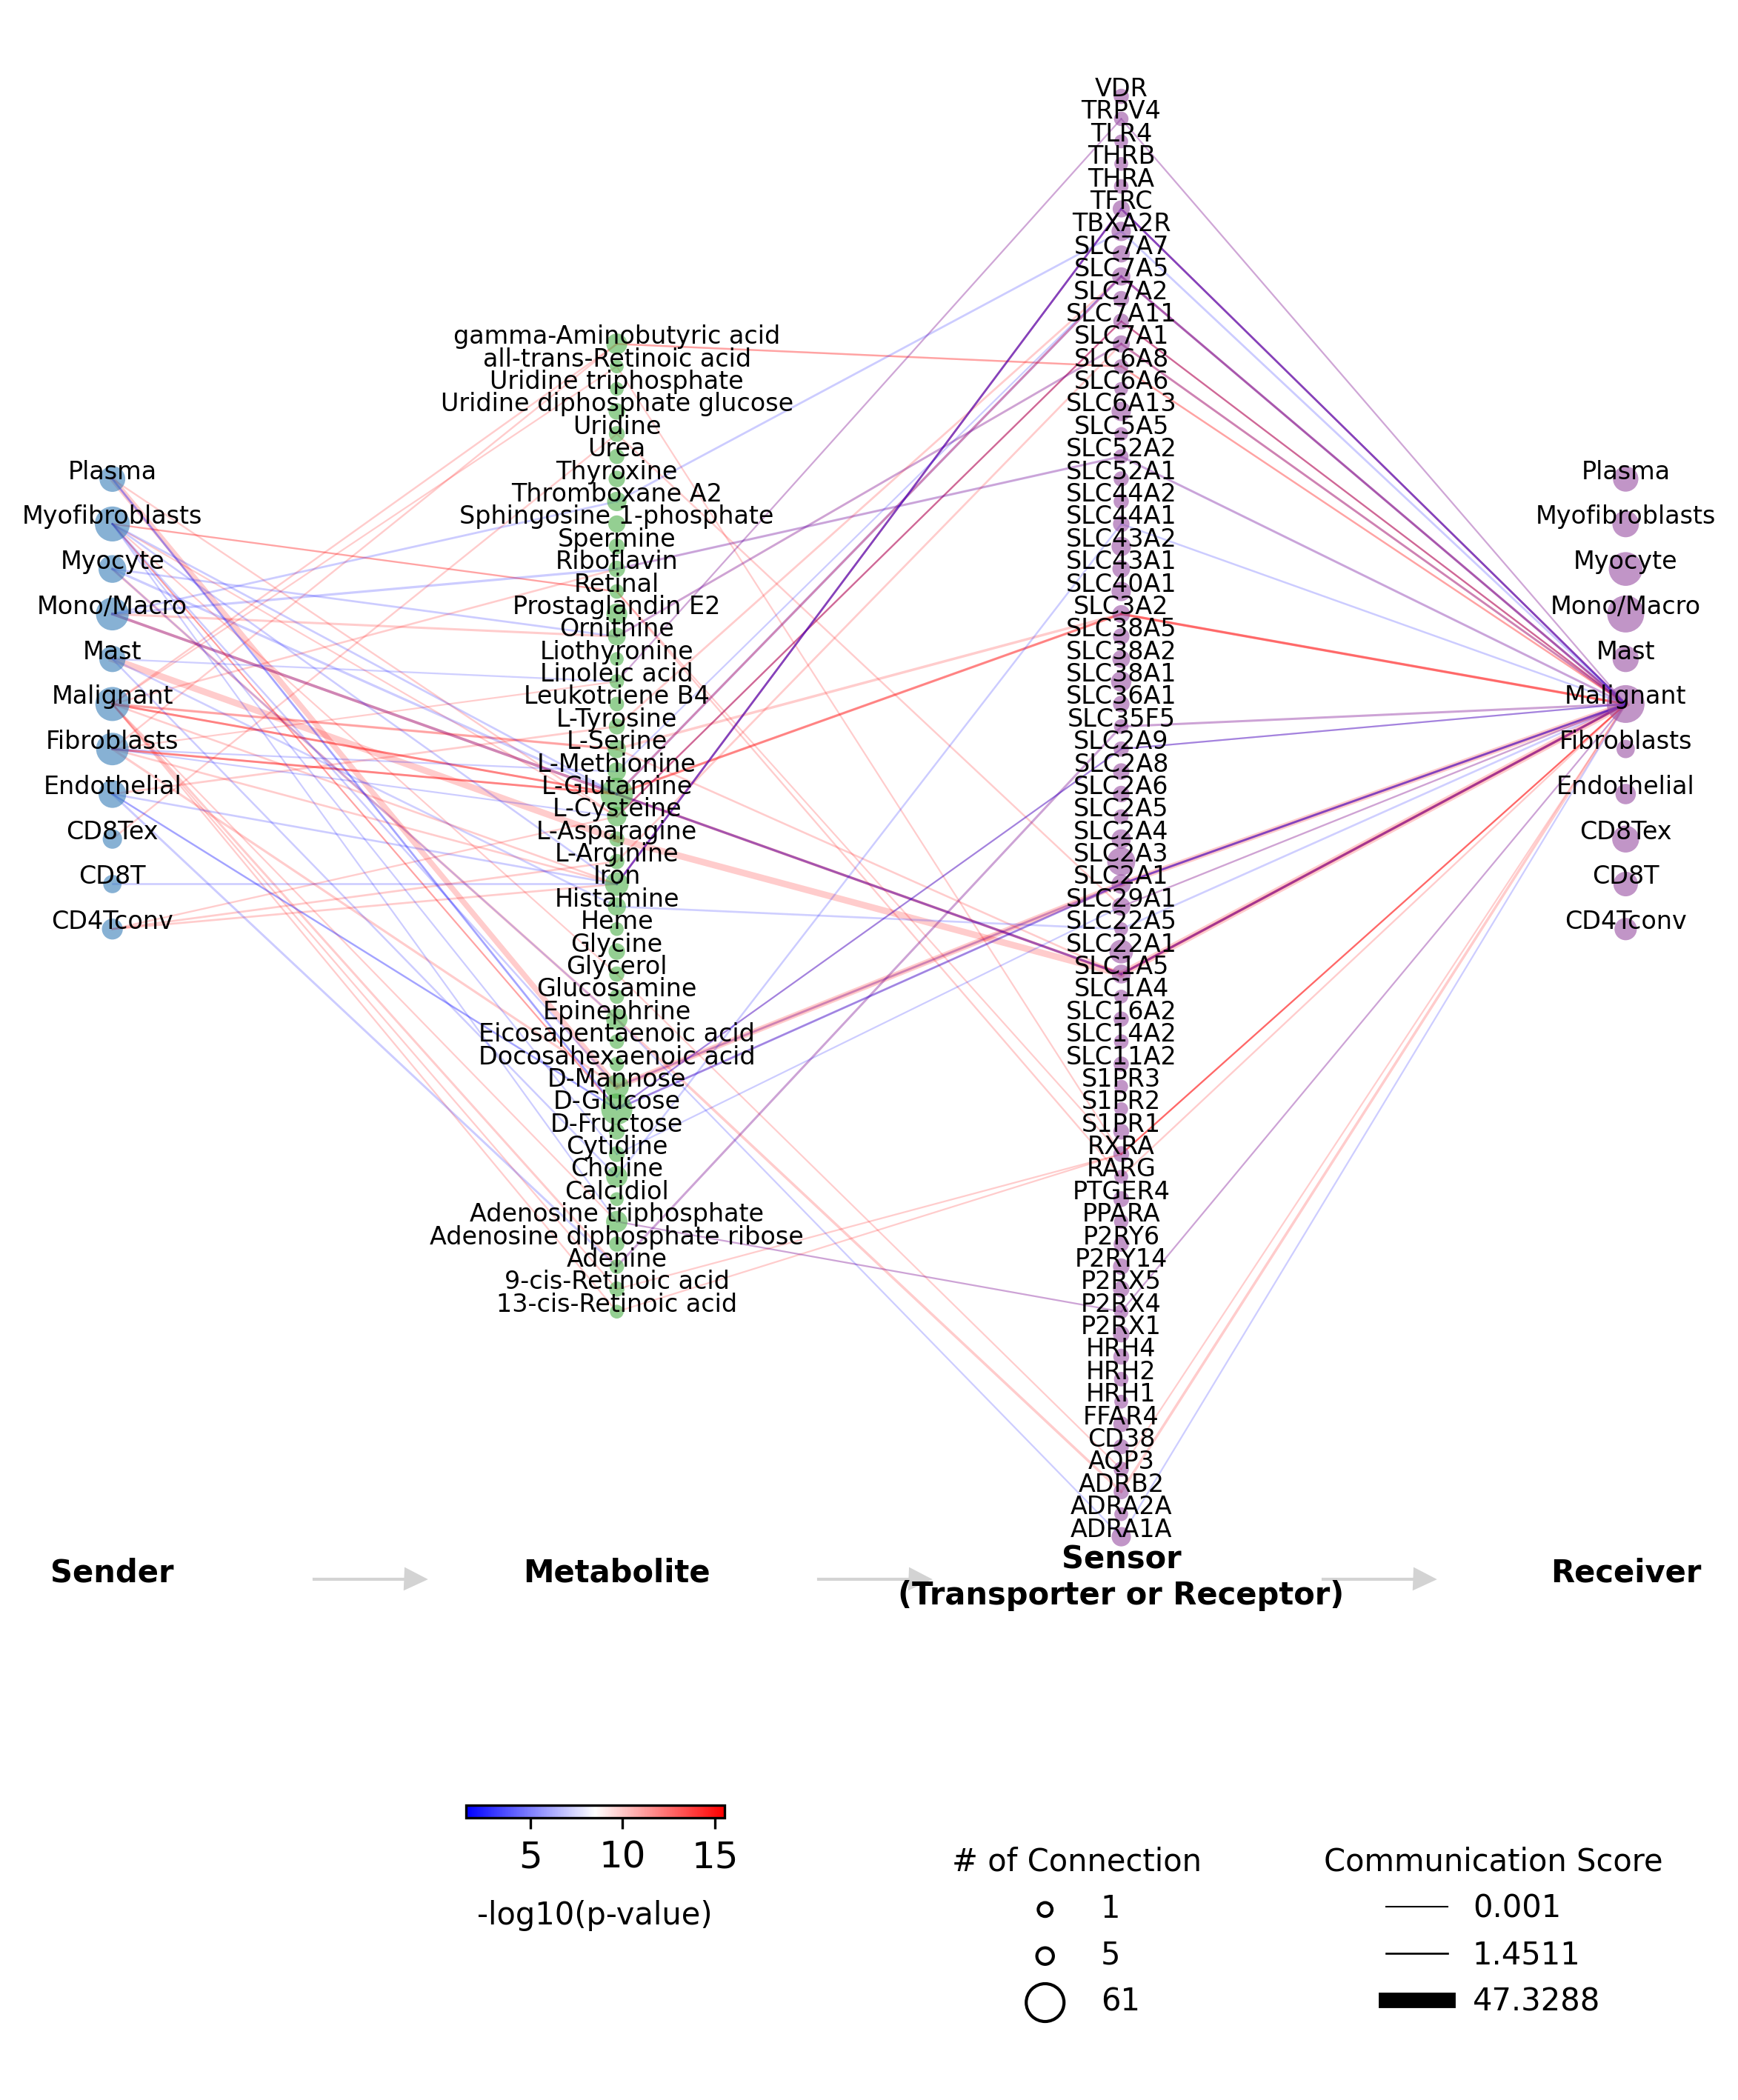

In [53]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.FlowPlot(
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=['Malignant'],
                remove_unrelevant = False,
                and_or='and',
                node_label_size=8,
                node_alpha=0.6,
                figsize='auto',
                node_cmap='Set1',
                line_cmap='bwr',
                line_vmin = None,
                line_vmax = 15.5,
                node_size_norm=(20, 150),
                linewidth_norm=(0.5, 5),
                save=None,
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                text_outline=False,
                return_fig = False
            )

[November 30, 2022 13:54:58]: Warnings: no sensors to plot
[November 30, 2022 13:54:58]: Find metabolites ['13-cis-Retinoic acid', '9-cis-Retinoic acid', 'Adenine', 'Adenosine triphosphate', 'Adenosine diphosphate ribose'] to plot violin


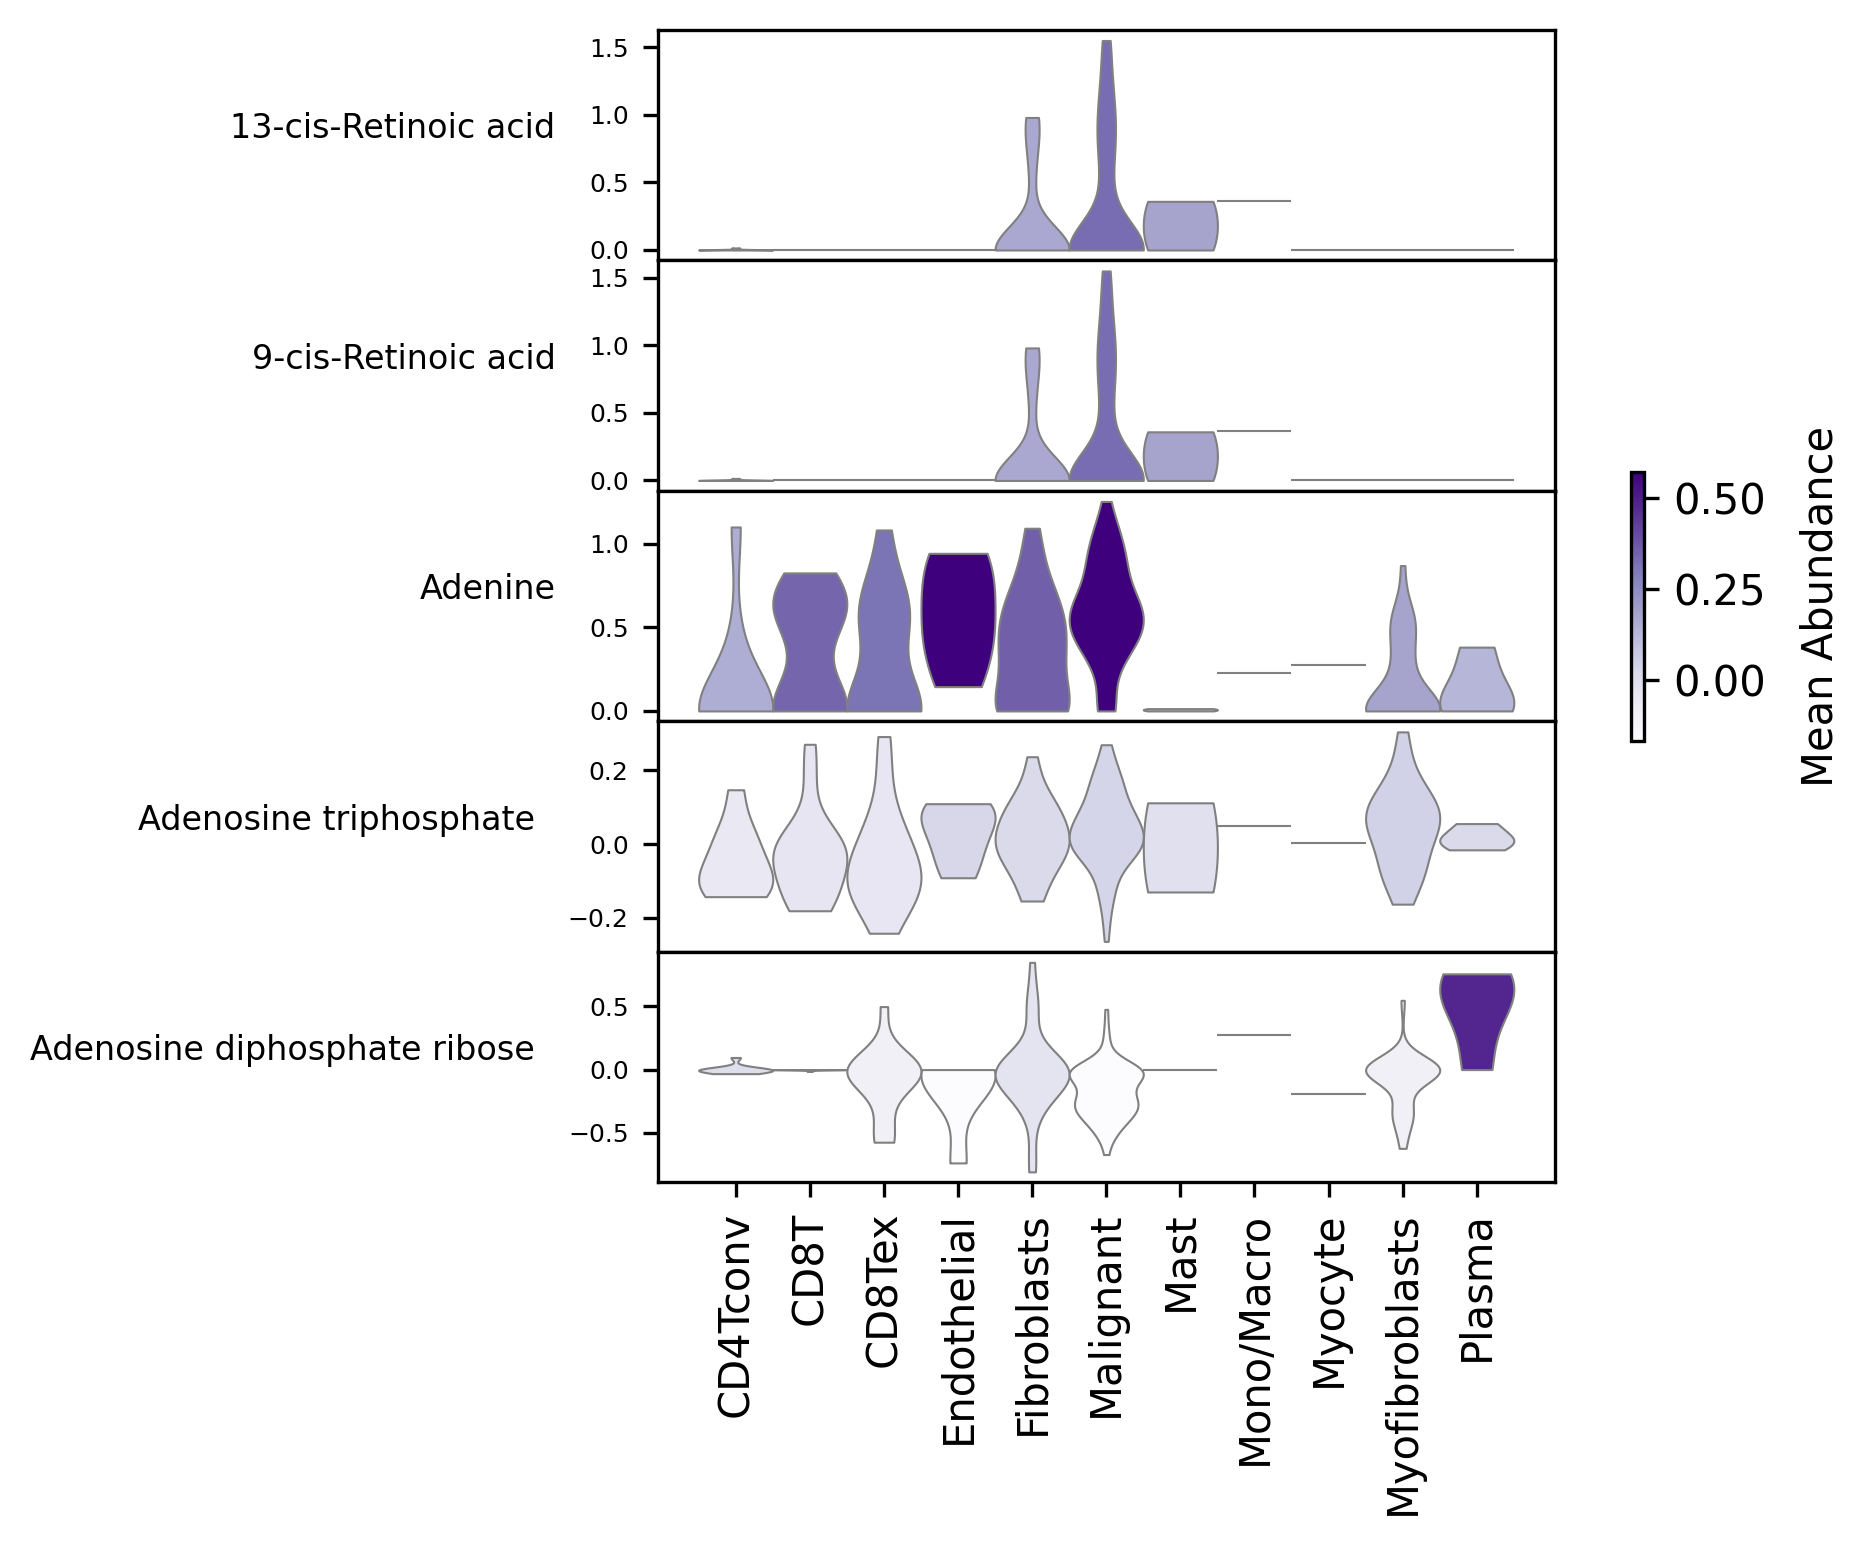

In [54]:
## violin plot to show the estimated metabolite abundance of informative metabolties in communication
### here we show five significant metabolites,
### users can pass several metabolites of interest by provide a list
commu_df = mebo_obj.commu_res.copy()
good_met = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Metabolite_Name'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_met[:5], ## only top 5 as example
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )

[November 30, 2022 13:55:15]: Find genes Index(['CD38', 'AQP3', 'ADRA1A', 'ADRB2', 'ADRA2A'], dtype='object') to plot violin


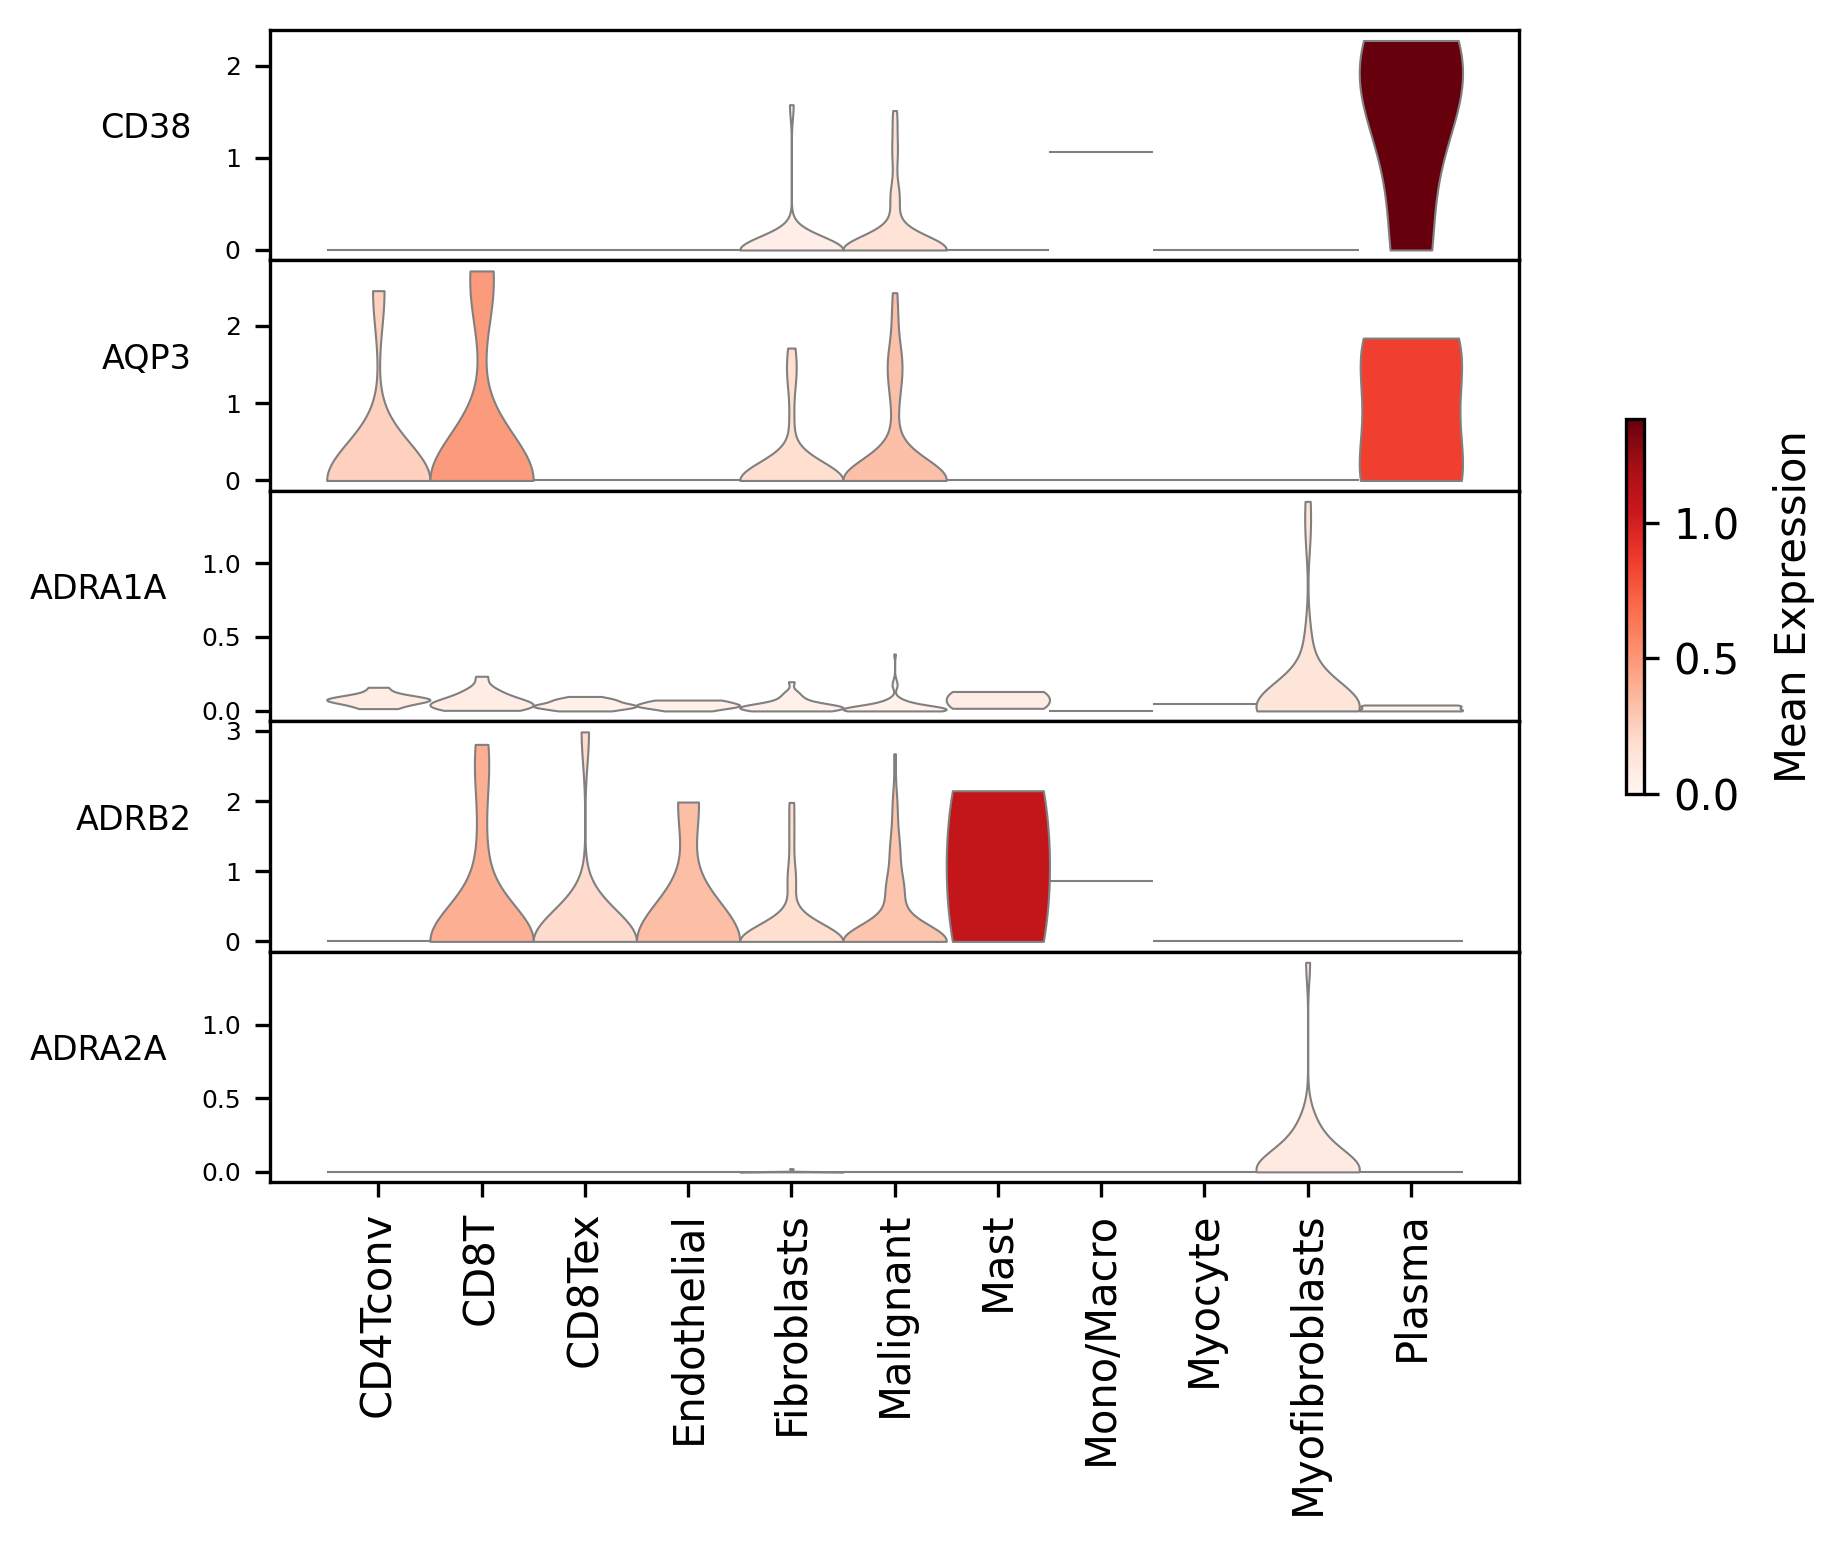

[November 30, 2022 13:55:17]: Warnings: no metabolites to plot


In [55]:
## violin plot to show the expression of informative sensors in communication

good_sensor = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Sensor'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_sensor[:5],## only top 5 as example
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )

In [56]:
### the updated and tidy communication result is in object, can be retreved by:
commu_res = mebo_obj.commu_res.copy()
## filter by FDR less than 0.05
commu_res = commu_res[commu_res['permutation_test_fdr']<=0.05]
## write to tsv file
commu_res.to_csv('/Users/elias/Documents/Praktika/Julio_Saez-Rodriguez/Python/communication_result.tsv', sep = '\t', index = None)

In [57]:
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    ## Note that filename passed by save parameter:
                    save='/Users/elias/Documents/Praktika/Julio_Saez-Rodriguez/Python/mebocost_eventnum.pdf',
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )

In [58]:
fig = mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=False,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )
## save figure
fig.savefig('/Users/elias/Documents/Praktika/Julio_Saez-Rodriguez/Python/mebocost_eventnum.pdf')

AttributeError: 'NoneType' object has no attribute 'savefig'

In [ ]:
## here, users can click and plot figures

## interactive view module mimic a website but all go with our default parameters

mebo_obj.communication_in_notebook(pval_method='permutation_test_fdr',
                                    pval_cutoff=0.05,
                                    comm_score_col='Commu_Score',
                                    comm_score_cutoff=None,
                                    cutoff_prop=None)

In [61]:
mebo_obj.infer_pathway(
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    commu_score_cutoff=0,
                    commu_score_column='Commu_Score',
                    min_term=15,
                    max_term=500,
                    thread=None,
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    Return_res=False
                    )

[November 30, 2022 14:25:36]: Read gene set from GMT file
[November 30, 2022 14:25:36]: Weight gene expression by gene network score of sensor
[November 30, 2022 14:26:33]: Weighted expression deconvolution to metabolite-sensor events
[November 30, 2022 14:26:33]: 134 sensor-receiver pairs
[November 30, 2022 14:34:05]: Weighted expression deconvolution to sender-receiver events
[November 30, 2022 14:34:05]: 102 sender-receiver pairs
[November 30, 2022 14:34:08]: Enrichment for significant sensor in receiver cell
[November 30, 2022 14:34:08]: Thread: 8


TypeError: get_xlmhg_stat() takes from 3 to 4 positional arguments but 6 were given

In [ ]:
### retreve pathways for sensor in receiver cells
## the result saved by sensor ~ receiver as a python dict
## show all the sensor~receivers
print('All sensor ~ receivers:', mebo_obj.enrich_result['sensor_res'].keys())

In [ ]:


## retreve pathway enrichment for one sensor receiver pair
sensor_receiver = 'HRH4 ~ CD8Tex'
mebo_obj.enrich_result['sensor_res'][sensor_receiver]['mHG_res']



In [ ]:
### similarily for pathways between a pair of cells which are sender and receiver cells
## show all the sensor~receivers
print('All sender ~ receiver:', mebo_obj.enrich_result['cellpair_res'].keys())

In [ ]:
## retreve pathways for one sensor receiver pair
sender_receiver = 'Endothelial ~ Malignant'
mebo_obj.enrich_result['cellpair_res'][sender_receiver]['mHG_res']

In [ ]:
## check significant pathways for a sensor in receiver cell
## a interesting sensor in receiver cell should be defined by users,
## Visualization of communications in Demo_Communication_Predict tutorial will help to users.

## here, take SLC1A5 in Malignant cells as an example
mebo_obj.pathway_scatter(
                            a_pair='SLC1A5 ~ Malignant',
                            pval_cutoff=0.05,
                            ES_cutoff=0,
                            cmap='cool',
                            vmax=None,
                            vmin=None,
                            figsize='auto',
                            title='',
                            maxSize=500,
                            minSize=15,
                            save=None,
                            show_plot=True
                        )

In [ ]:
## check pathway for a pair of sender and receiver
## sender is Endothelial and receiver is Malignant
mebo_obj.pathway_scatter(
                            a_pair='Endothelial ~ Malignant',
                            pval_cutoff=0.05,
                            ES_cutoff=0,
                            cmap='cool',
                            vmax=None,
                            vmin=None,
                            figsize='auto',
                            title='',
                            maxSize=500,
                            minSize=15,
                            save=None,
                            show_plot=True
                        )

In [ ]:
mebo_obj.pathway_stacked_bar(
                        pair1='SLC38A2 ~ Malignant',
                        pair2='SLC1A5 ~ Malignant',
                        pval_cutoff=0.05,
                        ES_cutoff=0,
                        cmap='spring_r',
                        vmax=None,
                        vmin=None,
                        figsize='auto',
                        title='',
                        maxSize=500,
                        minSize=15,
                        colors=['#CC6677', '#1E90FF'],
                        save=None,
                        show_plot=True,
                        return_fig=False
                        )

In [ ]:
### here taking sender ~ receiver as an example
mebo_obj.pathway_multi_dot(
                        pairs = ['Malignant ~ Malignant', 'Mast ~ Malignant', 'Endothelial ~ Malignant'],
                        pval_cutoff=0.05,
                        ES_cutoff=0,
                        cmap='Spectral_r',
                        vmax=None,
                        vmin=None,
                        node_size_norm=(20, 100),
                        figsize='auto',
                        title='',
                        maxSize=500,
                        minSize=15,
                        save=None,
                        show_plot=True,
                        swap_axis=True,
                        return_fig=False
                    )

In [ ]:
## here taking 'Estrogen signaling pathway' in 'SLC1A5 ~ Malignant' as an example
mebo_obj.pathway_ES_plot(
                        a_pair='SLC1A5 ~ Malignant',
                        pathway='Estrogen signaling pathway',
                        figsize=(8, 3.5),
                        dot_color='#1874CD',
                        curve_color='black',
                        title='',
                        save=None,
                        show_plot=True,
                        return_fig=False,
                        return_data=False
                    )